In [3]:
from google.colab import files
uploaded = files.upload()

Saving heart disease classification dataset.csv to heart disease classification dataset.csv


In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler

In [228]:
data = pd.read_csv('heart disease classification dataset.csv')
data=data.drop('index', axis=1) # Edited the first column header and added index as header name so that I can drop that column

impute = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

impute.fit(data[['trestbps']])
impute.fit(data[['chol']])
impute.fit(data[['thalach']])

data['trestbps'] = impute.transform(data[['trestbps']])
data['chol'] = impute.transform(data[['chol']])
data['thalach'] = impute.transform(data[['thalach']])

X = data.iloc[:,2:13]
y = data.iloc[:,13]
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
svm = SVC(kernel="linear")
svm.fit(x_train, y_train)
prePcaSvmTrainScore = round(svm.score(x_train, y_train)*100,2)
prePcaSvmTestScore = round(svm.score(x_test, y_test)*100,2)
print("Training accuracy of SVM is " + str(prePcaSvmTrainScore))
print("Testing accuracy of SVM is "+ str(prePcaSvmTestScore))

Training accuracy of SVM is 83.88
Testing accuracy of SVM is 90.16


In [229]:
data = pd.read_csv('heart disease classification dataset.csv')
data=data.drop('index', axis=1) # Edited the first column header and added index as header name so that I can drop that column

impute = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

impute.fit(data[['trestbps']])
impute.fit(data[['chol']])
impute.fit(data[['thalach']])

data['trestbps'] = impute.transform(data[['trestbps']])
data['chol'] = impute.transform(data[['chol']])
data['thalach'] = impute.transform(data[['thalach']])

X = data.iloc[:,2:13]
y = data.iloc[:,13]
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(x_train, y_train)
prePcaRfcTrainScore = round(rfc.score(x_train, y_train)*100,2)
prePcaRfcTestScore = round(rfc.score(x_test, y_test)*100,2)
print("Training accuracy of Random Forest is " + str(prePcaRfcTrainScore))
print("Testing accuracy of Random Forest is "+ str(prePcaRfcTestScore))

Training accuracy of Random Forest is 100.0
Testing accuracy of Random Forest is 91.8


In [231]:
data = pd.read_csv('heart disease classification dataset.csv')
data=data.drop('index', axis=1) # Edited the first column header and added index as header name so that I can drop that column

impute = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

impute.fit(data[['trestbps']])
impute.fit(data[['chol']])
impute.fit(data[['thalach']])

data['trestbps'] = impute.transform(data[['trestbps']])
data['chol'] = impute.transform(data[['chol']])
data['thalach'] = impute.transform(data[['thalach']])

X = data.iloc[:,2:13]
y = data.iloc[:,13]
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)
nnc=MLPClassifier(hidden_layer_sizes=(10), activation="relu", max_iter=10000)
nnc.fit(x_train, y_train)
prePcaNncTrainScore = round(nnc.score(x_train, y_train)*100,2)
prePcaNncTestScore = round(nnc.score(x_test, y_test)*100,2)
print("Training accuracy of NNC is " + str(prePcaNncTrainScore))
print("Testing accuracy of NNC is "+ str(prePcaNncTestScore))

Training accuracy of NNC is 80.58
Testing accuracy of NNC is 85.25


In [160]:
data = pd.read_csv('heart disease classification dataset.csv')
data=data.drop('index', axis=1) # Edited the first column header and added index as header name so that I can drop that column

impute = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

impute.fit(data[['trestbps']])
impute.fit(data[['chol']])
impute.fit(data[['thalach']])

data['trestbps'] = impute.transform(data[['trestbps']])
data['chol'] = impute.transform(data[['chol']])
data['thalach'] = impute.transform(data[['thalach']])
pd.options.mode.chained_assignment = None  # default='warn'
data.sex[data.sex == 'female'] = 0 
data.sex[data.sex == 'male'] = 1 

data.target[data.target == 'no'] = 0 
data.target[data.target == 'yes'] = 1 

scaler= StandardScaler()
scaledData = scaler.fit_transform(data)

n = int (data.shape[1]/2)

pca = PCA(n_components=n)
principal_components= pca.fit_transform(scaledData)

principal_df = pd.DataFrame(data=principal_components, columns=["principle component 1", "principle component 2","principle component 3","principle component 4","principle component 5","principle component 6","principle component 7"])
main_df=pd.concat([principal_df, data[["target"]]], axis=1)
main_df.head()


,principle component 1,principle component 2,principle component 3,principle component 4,principle component 5,principle component 6,principle component 7,target
0,-0.084314,2.536555,0.890888,3.549690,0.275661,1.807430,-0.215444,1
1,-0.821685,-0.699143,-0.455159,2.837999,2.127356,-0.774023,-0.314301,1
2,-2.060801,-0.035940,-0.555508,0.043903,0.862594,0.719376,-0.057917,1
3,-1.899970,-0.615861,0.058671,-0.082125,-0.253955,-0.479600,-0.165977,1
4,-0.424639,1.556274,-1.690171,-1.823221,0.404175,-0.615190,2.205942,1


In [232]:
X= main_df.drop("target" , axis=1)
y= main_df["target"]
y=y.astype('int')
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)
svm = SVC(kernel="linear")
svm.fit(x_train, y_train)
postPcaSvmTrainScore = round(svm.score(x_train, y_train)*100,2)
postPcaSvmTestScore = round(svm.score(x_test, y_test)*100,2)
print("Training accuracy of SVM post PCA is " + str(postPcaSvmTrainScore))
print("Testing accuracy of SVM post PCA is "+ str(postPcaSvmTestScore))

Training accuracy of SVM post PCA is 93.8
Testing accuracy of SVM post PCA is 96.72


In [233]:
X= main_df.drop("target" , axis=1)
y= main_df["target"]
y=y.astype('int')
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(x_train, y_train)
postPcaRfcTrainScore = round(rfc.score(x_train, y_train)*100,2)
postPcaRfcTestScore = round(rfc.score(x_test, y_test)*100,2)
print("Training accuracy of Random Forest post PCA is " + str(postPcaRfcTrainScore))
print("Testing accuracy of Random Forest post PCA is "+ str(postPcaRfcTestScore))

Training accuracy of Random Forest post PCA is 100.0
Testing accuracy of Random Forest post PCA is 95.08


In [234]:
X= main_df.drop("target" , axis=1)
y= main_df["target"]
y=y.astype('int')
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)
nnc=MLPClassifier(hidden_layer_sizes=(10), activation="relu", max_iter=10000)
nnc.fit(x_train, y_train)
postPcaNncTrainScore = round(nnc.score(x_train, y_train)*100,2)
postPcaNncTestScore = round(nnc.score(x_test, y_test)*100,2)
print("Training accuracy of NNC post PCA is " + str(postPcaNncTrainScore))
print("Testing accuracy of NNC post PCA is "+ str(postPcaNncTestScore))

Training accuracy of NNC post PCA is 95.45
Testing accuracy of NNC post PCA is 95.08


Text(0.5, 1.0, 'Test Score')

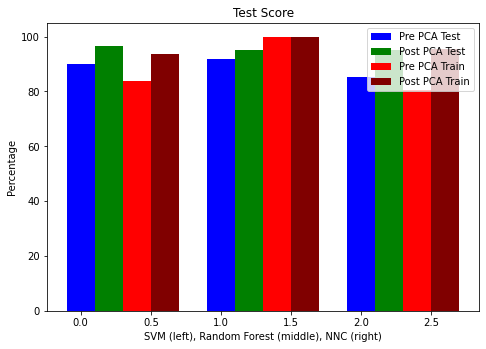

In [253]:
data = [[prePcaSvmTestScore, prePcaRfcTestScore, prePcaNncTestScore],
[postPcaSvmTestScore, postPcaRfcTestScore, postPcaNncTestScore],
[prePcaSvmTrainScore, prePcaRfcTrainScore, prePcaNncTrainScore],
[postPcaSvmTrainScore, postPcaRfcTrainScore, postPcaNncTrainScore]]
X = np.arange(3)

fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.bar(X + 0.00, data[0], color = 'blue', width = 0.20)
ax.bar(X + 0.20, data[1], color = 'green', width = 0.20)
ax.bar(X + 0.40, data[2], color = 'red', width = 0.20)
ax.bar(X + 0.60, data[3], color = 'maroon', width = 0.20)

ax.legend(labels=['Pre PCA Test', 'Post PCA Test','Pre PCA Train','Post PCA Train'])

plt.ylabel('Percentage')
plt.xlabel('SVM (left), Random Forest (middle), NNC (right)')
plt.title('Test Score')